In [1]:
import pandas as pd
import numpy as np

# 주요 라이브러리 import
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
from sklearn.datasets import fetch_openml
import sklearn.datasets as data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#라벨인코더 임포트
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from pandas.plotting import parallel_coordinates#코디네이츠 그래프 그릴 때 필요한 라이브러리
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier#모델링 중 하나
#cross_val_score: 다양한 셈플링을 해서 여러번 테스트-->평균치를 구해본다.
from sklearn.model_selection import cross_val_score#crossvaludation해주는거
from sklearn.metrics import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도

from sklearn.model_selection import GridSearchCV#그리드서치
from sklearn.preprocessing import StandardScaler #표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, mix-max기준)
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
#앙상블
from sklearn.ensemble import VotingClassifier

from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier## tree방법론의 DecisionTreeClassifier사용
from sklearn.svm import SVC##svm방법론의 SVC사용
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.experimental import  enable_hist_gradient_boosting
from sklearn.ensemble import  HistGradientBoostingClassifier
from xgboost import  XGBClassifier
from lightgbm import  LGBMClassifier

In [7]:
#코렙한글쓰기.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
# 여기까지하고 런타임 다시 시작!!-----> 이 셀부터 설치빼고 다시 실행

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [3]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font_name) 
print(font_name)

NanumBarunGothic


In [5]:
#fm._rebuild()

Text(0.5, 1.0, '안녕!')

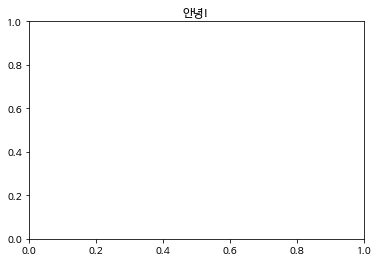

In [4]:
plt.title('안녕!')

In [2]:
df = pd.read_excel('/content/쇼핑몰프로젝트DATA.xlsx')
df.head()

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,건수합계,인터넷 쇼핑 이용자 비율 (%),월 평균 구매빈도-1회 미만 (%),월 평균 구매빈도-1~2회 미만 (%),월 평균 구매빈도-2~3회 미만 (%),월 평균 구매빈도-3회 이상 (%),월 평균 구매빈도-평균 (회)
0,2019,생활/취미/사무용품/인테리어/골프용품,평일,목,B.06-10시,F,A.2O대,291,98.7,10.9,18.6,22.8,47.7,3.3
1,2020,생활/취미/사무용품/인테리어/골프용품,평일,월,D.14-18시,M,C.4O대,6225,66.7,28.3,17.9,21.0,32.8,2.9
2,2019,생활/취미/사무용품/인테리어/골프용품,휴일,일,F.22-02시,M,B.3O대,51,86.3,14.6,21.3,22.4,41.7,2.9
3,2021,패션/화장품,휴일,일,D.14-18시,F,C.4O대,3564,89.8,9.3,14.9,17.6,58.2,5.3
4,2020,생활/취미/사무용품/인테리어/골프용품,평일,월,C.10-14시,F,D.5O대,1101,46.3,28.2,14.1,20.2,37.4,3.4


## 일:1, 월:2, 화:3, 수:4, 목:5, 금:6, 토:7로 바꿈
## 휴일:0, 평일:1
##


In [9]:
df.isnull().sum()

CRI_YM    0
TAG       0
평일휴일      0
요일        0
시간대       0
성별        0
연령대       0
건수합계      0
dtype: int64

In [25]:
df.columns

Index(['CRI_YM', 'TAG', '평일휴일', '요일', '시간대', '성별', '연령대', '건수합계',
       '인터넷 쇼핑 이용자 비율 (%)', '월 평균 구매빈도-1회 미만 (%)', '월 평균 구매빈도-1~2회 미만 (%)',
       '월 평균 구매빈도-2~3회 미만 (%)', '월 평균 구매빈도-3회 이상 (%)', '월 평균 구매빈도-평균 (회)'],
      dtype='object')

In [3]:
# 라벨인코딩을 하여 수치가 아닌 값들을 수치화해주자.
encoder = LabelEncoder()
df['평일휴일'] = encoder.fit_transform(df['평일휴일'])


In [4]:
encoder1 = LabelEncoder()
df['요일'] = encoder1.fit_transform(df['요일'])

In [5]:
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()
encoder4 = LabelEncoder()

df['시간대'] = encoder2.fit_transform(df['시간대'])
df['성별'] = encoder3.fit_transform(df['성별'])
df['연령대'] = encoder4.fit_transform(df['연령대'])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CRI_YM                 19997 non-null  int64  
 1   TAG                    19997 non-null  object 
 2   평일휴일                   19997 non-null  int64  
 3   요일                     19997 non-null  int64  
 4   시간대                    19997 non-null  int64  
 5   성별                     19997 non-null  int64  
 6   연령대                    19997 non-null  int64  
 7   건수합계                   19997 non-null  int64  
 8   인터넷 쇼핑 이용자 비율 (%)      19997 non-null  float64
 9   월 평균 구매빈도-1회 미만 (%)    19997 non-null  float64
 10  월 평균 구매빈도-1~2회 미만 (%)  19997 non-null  float64
 11  월 평균 구매빈도-2~3회 미만 (%)  19997 non-null  float64
 12  월 평균 구매빈도-3회 이상 (%)    19997 non-null  float64
 13  월 평균 구매빈도-평균 (회)       19997 non-null  float64
dtypes: float64(6), int64(7), object(1)
memory usage: 2.1+ 

In [53]:
#tag컬럼에서 '홈쇼핑'값을 없애보자-> 어케함...
#df.drop(df['TAG']['홈쇼핑'],inplace=True)
#df.head()

KeyError: ignored

In [51]:
df.loc[1]

CRI_YM      202005
TAG        생활/사무용품
평일휴일            평일
요일               월
시간대       D.14-18시
성별               M
연령대          C.4O대
건수합계          6225
Name: 1, dtype: object

In [60]:
#라벨인코딩을 해주자
# 지금데이터는 안해줘도 됨. 다 수치화해서

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['CRI_YM', '평일휴일', '요일', '시간대', '성별', '연령대', '건수합계',
       '인터넷 쇼핑 이용자 비율 (%)', '월 평균 구매빈도-1회 미만 (%)', '월 평균 구매빈도-1~2회 미만 (%)',
       '월 평균 구매빈도-2~3회 미만 (%)', '월 평균 구매빈도-3회 이상 (%)', '월 평균 구매빈도-평균 (회)']],
    df['TAG'],
    test_size=0.2,
    random_state=42

)

In [27]:
X_train.shape, X_test.shape

((15997, 13), (4000, 13))

In [28]:
y_train.shape, y_test.shape

((15997,), (4000,))

In [29]:
y_train[:10]

5748                   패션/화장품
1688                   패션/화장품
8174                     애완용품
10194    생활/취미/사무용품/인테리어/골프용품
4667                   패션/화장품
5198     생활/취미/사무용품/인테리어/골프용품
196      생활/취미/사무용품/인테리어/골프용품
518                       식료품
19140    생활/취미/사무용품/인테리어/골프용품
17652                  패션/화장품
Name: TAG, dtype: object

In [30]:
## 단일 모델들에 대한 객체 생성
## voting(hard/soft)

In [43]:
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth = 3,
    max_features = 13,
    random_state = 100
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=13, random_state=100)

In [52]:
svc = SVC(
    kernel = 'rbf',
    C=0.1,
    gamma=10,
    probability=True,
    random_state = 10
)
svc.fit(X_train, y_train)

SVC(C=0.1, gamma=10, probability=True, random_state=10)

In [45]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [46]:
dt_predt = dt.predict(X_test)

In [47]:
svc_predt = svc.predict(X_test)

In [48]:
lr_predt = lr.predict(X_test)

In [49]:
dt_acc = accuracy_score(y_test, dt_predt)
#svc_acc = accuracy_score(y_test, svc_predt)
lr_acc = accuracy_score(y_test, lr_predt)
dt_acc, lr_acc

(0.61075, 0.6115)

In [51]:
## 하드 보팅
voting_clf1 = VotingClassifier(
    estimators= [
        ('decision tree', dt), 
        ('svc', svc), 
        ('lr', lr)
    ],
    weights=[1, 1, 1],
    voting='hard'
)
voting_clf1.fit(X_train, y_train)
hard_voting_predicted = voting_clf1.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

NameError: ignored

In [ ]:
## 소프트 보팅
# voting_clf2 = VotingClassifier(
#     estimators= [
#         ('decision tree', dt), 
#         ('svc', svc), 
#         ('lr', lr)
#     ],
#     weights=[1, 1, 1],
#     voting='soft'
# )
# voting_clf2.fit(X_train, y_train)
# soft_voting_predicted = voting_clf2.predict(X_test)
# accuracy_score(y_test, soft_voting_predicted)

In [ ]:
### 그래프로 그려보세요. accuracy(dtree, knn, svm, hard voting, soft voting)
# import matplotlib.pyplot as plt
# import numpy as np
# %matplotlib inline

# x = np.arange(2)
# plt.bar(x, height= [
#                     accuracy_score(y_test, hard_voting_predicted),
#                     accuracy_score(y_test, soft_voting_predicted)
#             ])
# plt.xticks(x, ['hard voting','soft voting']);

In [38]:
## bagging
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=10
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=10)

In [39]:
rf_predt = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predt)
rf_acc

0.60425

In [23]:
# x = np.arange(3)
# plt.bar(x, height= [
#                     accuracy_score(y_test, hard_voting_predicted),
#                     accuracy_score(y_test, soft_voting_predicted),
#                     accuracy_score(y_test, rf_predt)
#             ])
# plt.xticks(x, ['hard voting','soft voting', 'bagging']);

In [24]:
# confusion_matrix(y_test, soft_voting_predicted)

In [40]:
confusion_matrix(y_test, rf_predt)

array([[2405,    0,    0,    2],
       [ 298,    0,    0,    0],
       [ 324,    0,    0,    0],
       [ 959,    0,    0,   12]])

In [41]:
gbc = GradientBoostingClassifier(
     random_state=42
).fit(X_train, y_train)

In [42]:
gbc_predicted = gbc.predict(X_test)
accuracy_score(y_test, gbc_predicted)

0.62475